In [27]:
from ecell4 import *
import numpy as np
import math
import sys
import os
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from ecell4.extra import ensemble

def wrap(job,job_id,task_id):
    def singlerun(kf,run,L,shift,Nc,Ns,Da,Ds,duration):
        import numpy as np
        from math import sqrt
        rm=0.005
        run+=shift
        rng = GSLRandomNumberGenerator()
        rng.seed(run)
        Db=Da
        k1=1000
        k2=kf
        k3=kf
        voxelr=rm
        tm =(2*voxelr)**2/(4*Da)        
        H = 3*voxelr*2
        ori = Real3(0.5*H,0,0)
        unit0 = Real3(0,0,L)
        unit1 = Real3(0,L,0)
        w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)
        w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
        size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
        Nmv=size[1]*size[2]
        if run==1:
            print('Ns',Nmv)
        D0=0
        with species_attributes():
            A |  {'D': str(Da), 'radius':str(voxelr),'location':'M'}
            B |  {'D': str(Db), 'radius':str(voxelr),'location':'M'}
            AB |  {'D': str(D0), 'radius':str(voxelr),'location':'M'}
            PP |  {'D': str(D0), 'radius':str(voxelr),'location':'M'}
            S |  {'D': str(Ds), 'radius':str(voxelr),'location':'M'}
            P |  {'D': str(D0), 'radius':str(voxelr),'location':'M'}

        with reaction_rules():
            AB > A+B | k1
            A+B>PP | k2
            A+S>P | k3
            B+S>P | k3

        m2 = get_model()
        w.bind_to(m2)
        w.add_molecules(Species('AB'), Nc)
        w.add_molecules(Species('S'), Ns)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        tfactor=5
        duration=duration
        obs = FixedIntervalNumberObserver(duration*0.05,['PP'])
        sim.run(duration,obs)       
        data=obs.data()
        #folder='/home/chew/outputdata/keff/2D/{}kfac{}_N{}_L{}_{}tm_{}rm_DB0/'.format(correct,kaf,N,L,tfactor,f)
        #name = folder+'run'+str(run)
        #if not os.path.exists(folder):
        #    os.makedirs(folder)            
        #filename=open(name,'w')
        #np.savetxt(name,data,delimiter=',',fmt='%s')
        #filename.close()       
        return data
    job.update({'run':task_id})
    out=singlerun(**job)
    return out       

simrun=40
kaf=0.1
nproc=500#250#
L=10
shift=0
result1=[]
result2=[]
C=25
N=int(C*L*L)
print('N',N)
Nc=N
Ns=N
D=1
DD=[[0.5*D,0.5*D],[D,0]]
dur=2
for i in range(2):
    Da=DD[i][0]
    Ds=DD[i][1]
    print(Da,Ds)
    # works in low conc, deviate when conc is high
    jobs=[{'kf':kaf,'L':L,'Nc':Nc,'Ns':Ns,'shift':shift,'Da':Da,'Ds':Ds,'duration':dur}]    
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=nproc,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[01,02,12,27]'])[0]
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=nproc,modules=('numpy','ecell4','math'))[0]
    res=np.array(res)
    t=np.mean(res.T[0],axis=1)
    nt1 = np.mean(res.T[1],axis=1)
    #nt2 = np.mean(res.T[2],axis=1)
    result1.append([t,nt1])
    #result2.append([t,nt2])
print('finish')

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:sge:Submitted batch job 2980643
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:2980643_[1-40%500]     debug sge-eyim     chew PD       0:00      1 (None)
DEBUG:sge:           2754893     debug job_01.s    niina  R 8-01:03:04      1 ibc01
DEBUG:sge:           2754894     debug job_08.s    niina  R 8-01:03:04      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 8-01:03:04      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 8-01:03:04      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 7-23:03:37      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 7-23:03:37      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 7-23:03:37      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 7-23:03:37      1 ibc06
DEBUG:sge:          

N 2500
0.5 0.5


INFO:sge:Waiting for jobids [2980643] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754893     debug job_01.s    niina  R 8-01:03:14      1 ibc01
DEBUG:sge:           2754894     debug job_08.s    niina  R 8-01:03:14      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 8-01:03:14      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 8-01:03:14      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 7-23:03:47      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 7-23:03:47      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 7-23:03:47      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 7-23:03:47      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 7-23:03:47      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 7-23:03:47      1 ibc19
DEBUG:sge:       

DEBUG:sge:        2980643_26     debug sge-eyim     chew  R       0:10      1 ibc17
DEBUG:sge:        2980643_27     debug sge-eyim     chew  R       0:10      1 ibc17
DEBUG:sge:        2980643_28     debug sge-eyim     chew  R       0:10      1 ibc17
DEBUG:sge:        2980643_29     debug sge-eyim     chew  R       0:10      1 ibc17
DEBUG:sge:        2980643_30     debug sge-eyim     chew  R       0:10      1 ibc17
DEBUG:sge:        2980643_31     debug sge-eyim     chew  R       0:10      1 ibc17
DEBUG:sge:        2980643_32     debug sge-eyim     chew  R       0:10      1 ibc13
DEBUG:sge:        2980643_33     debug sge-eyim     chew  R       0:10      1 ibc13
DEBUG:sge:        2980643_34     debug sge-eyim     chew  R       0:10      1 ibc13
DEBUG:sge:        2980643_35     debug sge-eyim     chew  R       0:10      1 ibc13
DEBUG:sge:        2980643_36     debug sge-eyim     chew  R       0:10      1 ibc13
DEBUG:sge:        2980643_37     debug sge-eyim     chew  R       0:10      

DEBUG:sge:        2980643_10     debug sge-eyim     chew  R       0:20      1 ibc28
DEBUG:sge:        2980643_11     debug sge-eyim     chew  R       0:20      1 ibc28
DEBUG:sge:        2980643_12     debug sge-eyim     chew  R       0:20      1 ibc28
DEBUG:sge:        2980643_13     debug sge-eyim     chew  R       0:20      1 ibc28
DEBUG:sge:        2980643_14     debug sge-eyim     chew  R       0:20      1 ibc28
DEBUG:sge:        2980643_15     debug sge-eyim     chew  R       0:20      1 ibc28
DEBUG:sge:        2980643_16     debug sge-eyim     chew  R       0:20      1 ibc28
DEBUG:sge:        2980643_17     debug sge-eyim     chew  R       0:20      1 ibc17
DEBUG:sge:        2980643_18     debug sge-eyim     chew  R       0:20      1 ibc17
DEBUG:sge:        2980643_19     debug sge-eyim     chew  R       0:20      1 ibc17
DEBUG:sge:        2980643_20     debug sge-eyim     chew  R       0:20      1 ibc17
DEBUG:sge:        2980643_21     debug sge-eyim     chew  R       0:20      

DEBUG:sge:           2978186     debug plane_10    niina  R   19:06:00      1 ibc22
DEBUG:sge:           2978187     debug plane_11    niina  R   19:06:00      1 ibc22
DEBUG:sge:           2978188     debug plane_12    niina  R   19:06:00      1 ibc22
DEBUG:sge:           2978189     debug plane_13    niina  R   19:06:00      1 ibc22
DEBUG:sge:           2978190     debug plane_14    niina  R   19:06:00      1 ibc22
DEBUG:sge:           2978191     debug plane_15    niina  R   19:06:00      1 ibc22
DEBUG:sge:           2978192     debug plane_16    niina  R   19:06:00      1 ibc22
DEBUG:sge:         2980643_1     debug sge-eyim     chew  R       0:30      1 ibc28
DEBUG:sge:         2980643_2     debug sge-eyim     chew  R       0:30      1 ibc28
DEBUG:sge:         2980643_3     debug sge-eyim     chew  R       0:30      1 ibc28
DEBUG:sge:         2980643_4     debug sge-eyim     chew  R       0:30      1 ibc28
DEBUG:sge:         2980643_5     debug sge-eyim     chew  R       0:30      

DEBUG:sge:           2978167     debug plane_07    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978168     debug plane_08    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978170     debug plane_10    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978171     debug plane_11    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978172     debug plane_12    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978173     debug plane_13    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978174     debug plane_14    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978175     debug plane_15    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978176     debug plane_16    niina  R   19:06:47      1 ibc21
DEBUG:sge:           2978177     debug plane_01    niina  R   19:06:10      1 ibc21
DEBUG:sge:           2978178     debug plane_02    niina  R   19:06:10      1 ibc21
DEBUG:sge:           2978180     debug plane_04    niina  R   19:06:10      

DEBUG:sge:           2765427     debug plane_30    niina  R 7-22:33:53      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 7-22:33:53      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 7-22:33:53      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 7-22:00:10      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 7-22:00:04      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 7-22:00:01      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 7-21:59:58      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 7-21:59:58      1 ibc19
DEBUG:sge:           2971615     debug plane_01    niina  R   23:31:43      1 ibc18
DEBUG:sge:           2971616     debug plane_02    niina  R   23:31:43      1 ibc19
DEBUG:sge:           2978161     debug plane_01    niina  R   19:06:58      1 ibc20
DEBUG:sge:           2978162     debug plane_02    niina  R   19:06:58      

DEBUG:sge:           2762412     debug plane_15    niina  R 7-23:04:37      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 7-23:04:37      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 7-22:34:04      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 7-22:34:04      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 7-22:34:04      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 7-22:34:04      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 7-22:34:04      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 7-22:34:04      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 7-22:34:04      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 7-22:34:03      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 7-22:34:03      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 7-22:34:03      

DEBUG:sge:           2762403     debug plane_06    niina  R 7-23:04:47      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 7-23:04:47      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 7-23:04:47      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 7-23:04:47      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 7-23:04:47      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 7-23:04:47      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 7-23:04:47      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 7-23:04:47      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 7-23:04:47      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 7-23:04:47      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 7-22:34:14      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 7-22:34:14      

Ns 1158312


DEBUG:sge:Submitted batch job 2980683
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:2980683_[1-40%500]     debug sge-m0cb     chew PD       0:00      1 (None)
DEBUG:sge:           2754893     debug job_01.s    niina  R 8-01:04:15      1 ibc01
DEBUG:sge:           2754894     debug job_08.s    niina  R 8-01:04:15      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 8-01:04:15      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 8-01:04:15      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 7-23:04:48      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 7-23:04:48      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 7-23:04:48      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 7-23:04:48      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 7-23:04:48      1 ibc06
DEBUG:sge:           27624

1 0


INFO:sge:Waiting for jobids [2980683] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754893     debug job_01.s    niina  R 8-01:04:25      1 ibc01
DEBUG:sge:           2754894     debug job_08.s    niina  R 8-01:04:25      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 8-01:04:25      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 8-01:04:25      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 7-23:04:58      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 7-23:04:58      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 7-23:04:58      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 7-23:04:58      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 7-23:04:58      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 7-23:04:58      1 ibc19
DEBUG:sge:       

DEBUG:sge:        2980683_27     debug sge-m0cb     chew  R       0:09      1 ibc17
DEBUG:sge:        2980683_28     debug sge-m0cb     chew  R       0:09      1 ibc17
DEBUG:sge:        2980683_29     debug sge-m0cb     chew  R       0:09      1 ibc17
DEBUG:sge:        2980683_30     debug sge-m0cb     chew  R       0:09      1 ibc17
DEBUG:sge:        2980683_31     debug sge-m0cb     chew  R       0:09      1 ibc17
DEBUG:sge:        2980683_32     debug sge-m0cb     chew  R       0:09      1 ibc13
DEBUG:sge:        2980683_33     debug sge-m0cb     chew  R       0:09      1 ibc13
DEBUG:sge:        2980683_34     debug sge-m0cb     chew  R       0:09      1 ibc13
DEBUG:sge:        2980683_35     debug sge-m0cb     chew  R       0:09      1 ibc13
DEBUG:sge:        2980683_36     debug sge-m0cb     chew  R       0:09      1 ibc13
DEBUG:sge:        2980683_37     debug sge-m0cb     chew  R       0:09      1 ibc13
DEBUG:sge:        2980683_38     debug sge-m0cb     chew  R       0:09      

DEBUG:sge:        2980683_12     debug sge-m0cb     chew  R       0:19      1 ibc28
DEBUG:sge:        2980683_13     debug sge-m0cb     chew  R       0:19      1 ibc28
DEBUG:sge:        2980683_14     debug sge-m0cb     chew  R       0:19      1 ibc28
DEBUG:sge:        2980683_15     debug sge-m0cb     chew  R       0:19      1 ibc28
DEBUG:sge:        2980683_16     debug sge-m0cb     chew  R       0:19      1 ibc28
DEBUG:sge:        2980683_17     debug sge-m0cb     chew  R       0:19      1 ibc17
DEBUG:sge:        2980683_18     debug sge-m0cb     chew  R       0:19      1 ibc17
DEBUG:sge:        2980683_19     debug sge-m0cb     chew  R       0:19      1 ibc17
DEBUG:sge:        2980683_20     debug sge-m0cb     chew  R       0:19      1 ibc17
DEBUG:sge:        2980683_21     debug sge-m0cb     chew  R       0:19      1 ibc17
DEBUG:sge:        2980683_22     debug sge-m0cb     chew  R       0:19      1 ibc17
DEBUG:sge:        2980683_23     debug sge-m0cb     chew  R       0:19      

DEBUG:sge:           2978189     debug plane_13    niina  R   19:07:11      1 ibc22
DEBUG:sge:           2978190     debug plane_14    niina  R   19:07:11      1 ibc22
DEBUG:sge:           2978191     debug plane_15    niina  R   19:07:11      1 ibc22
DEBUG:sge:           2978192     debug plane_16    niina  R   19:07:11      1 ibc22
DEBUG:sge:         2980683_1     debug sge-m0cb     chew  R       0:29      1 ibc28
DEBUG:sge:         2980683_2     debug sge-m0cb     chew  R       0:29      1 ibc28
DEBUG:sge:         2980683_3     debug sge-m0cb     chew  R       0:29      1 ibc28
DEBUG:sge:         2980683_4     debug sge-m0cb     chew  R       0:29      1 ibc28
DEBUG:sge:         2980683_5     debug sge-m0cb     chew  R       0:29      1 ibc28
DEBUG:sge:         2980683_6     debug sge-m0cb     chew  R       0:29      1 ibc28
DEBUG:sge:         2980683_7     debug sge-m0cb     chew  R       0:29      1 ibc28
DEBUG:sge:         2980683_8     debug sge-m0cb     chew  R       0:29      

DEBUG:sge:           2978172     debug plane_12    niina  R   19:07:58      1 ibc21
DEBUG:sge:           2978173     debug plane_13    niina  R   19:07:58      1 ibc21
DEBUG:sge:           2978174     debug plane_14    niina  R   19:07:58      1 ibc21
DEBUG:sge:           2978175     debug plane_15    niina  R   19:07:58      1 ibc21
DEBUG:sge:           2978176     debug plane_16    niina  R   19:07:58      1 ibc21
DEBUG:sge:           2978177     debug plane_01    niina  R   19:07:21      1 ibc21
DEBUG:sge:           2978178     debug plane_02    niina  R   19:07:21      1 ibc21
DEBUG:sge:           2978180     debug plane_04    niina  R   19:07:21      1 ibc22
DEBUG:sge:           2978181     debug plane_05    niina  R   19:07:21      1 ibc22
DEBUG:sge:           2978182     debug plane_06    niina  R   19:07:21      1 ibc22
DEBUG:sge:           2978183     debug plane_07    niina  R   19:07:21      1 ibc22
DEBUG:sge:           2978184     debug plane_08    niina  R   19:07:21      

DEBUG:sge:           2765431     debug  re08.sh    niina  R 7-22:01:15      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 7-22:01:12      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 7-22:01:09      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 7-22:01:09      1 ibc19
DEBUG:sge:           2971615     debug plane_01    niina  R   23:32:54      1 ibc18
DEBUG:sge:           2971616     debug plane_02    niina  R   23:32:54      1 ibc19
DEBUG:sge:           2978161     debug plane_01    niina  R   19:08:09      1 ibc20
DEBUG:sge:           2978162     debug plane_02    niina  R   19:08:09      1 ibc20
DEBUG:sge:           2978164     debug plane_04    niina  R   19:08:09      1 ibc21
DEBUG:sge:           2978165     debug plane_05    niina  R   19:08:09      1 ibc21
DEBUG:sge:           2978166     debug plane_06    niina  R   19:08:09      1 ibc21
DEBUG:sge:           2978167     debug plane_07    niina  R   19:08:08      

DEBUG:sge:           2765416     debug plane_19    niina  R 7-22:35:15      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 7-22:35:15      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 7-22:35:15      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 7-22:35:15      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 7-22:35:15      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 7-22:35:14      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 7-22:35:14      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 7-22:35:14      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 7-22:35:14      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 7-22:35:14      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 7-22:35:14      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 7-22:35:14      

DEBUG:sge:           2762400     debug plane_03    niina  R 7-23:05:59      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 7-23:05:59      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 7-23:05:59      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 7-23:05:59      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 7-23:05:59      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 7-23:05:59      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 7-23:05:59      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 7-23:05:59      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 7-23:05:59      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 7-23:05:59      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 7-23:05:59      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 7-23:05:59      

DEBUG:sge:        2980683_35     debug sge-m0cb     chew  R       1:10      1 ibc13
DEBUG:sge:        2980683_36     debug sge-m0cb     chew  R       1:10      1 ibc13
DEBUG:sge:        2980683_37     debug sge-m0cb     chew  R       1:10      1 ibc13
DEBUG:sge:        2980683_38     debug sge-m0cb     chew  R       1:10      1 ibc13
DEBUG:sge:        2980683_39     debug sge-m0cb     chew  R       1:10      1 ibc13
DEBUG:sge:        2980683_40     debug sge-m0cb     chew  R       1:10      1 ibc13
DEBUG:sge:
INFO:sge:Job 2980683 must be queued, running or being transferred
INFO:sge:Waiting for jobids [2980683] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754893     debug job_01.s    niina  R 8-01:05:36      1 ibc01
DEBUG:sge:           2754894     debug job_08.s    niina  R 8-01:05:36      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 8-01:05:36      1 ibc01
DEBUG:sge:           275

DEBUG:sge:           2762405     debug plane_08    niina  R 7-23:06:19      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 7-23:06:19      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 7-23:06:19      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 7-23:06:19      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 7-23:06:19      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 7-23:06:19      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 7-23:06:19      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 7-23:06:19      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 7-22:35:46      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 7-22:35:46      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 7-22:35:46      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 7-22:35:46      

Ns 1158312
finish


2500
Das 1.0 Dab 1.0
1163.35
Das 1 Dab 2
1155.925
[1131.325 1138.3   1144.65  1150.75  1155.925]
[0.78889797 0.7818677  0.70763989 0.65826635 0.64234271]


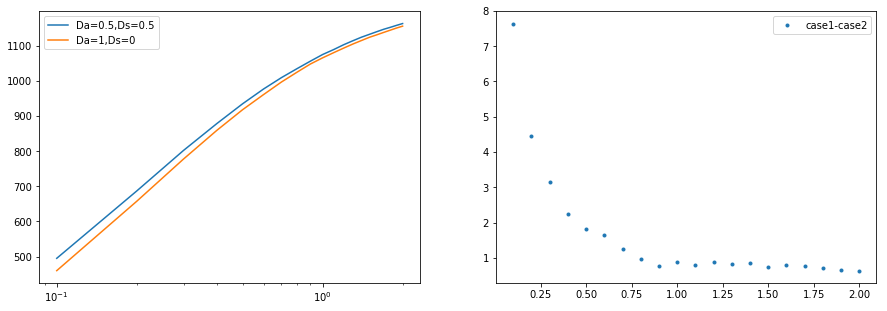

In [28]:
print(N)
fig,ax=plt.subplots(1,2,figsize=(15,5))
both=[]
for i,(t,nt) in enumerate(result1):
    Da=DD[i][0]
    Ds=DD[i][1]
    name = 'Da={},Ds={}'.format(Da,Ds)
    print('Das',Da+Ds,'Dab',Da*2)
    st=nt
    tt=t[1:]
    st=st[1:]
    print(st[-1])
    both.append(st)
    ax[0].semilogx(tt,st,'-',label=name) 
both=np.array(both)
#ax.plot(T,1.8*T**2,'g--')
#ax.plot(T,T,'r--')
print(nt[-5:])
#ax.plot(tt,0.001/np.log(tt))
#plt.plot(t,448*t,'--')
#plt.plot(t,t)
#plt.ylabel('s(t)')
#plt.ylim(60,150)
#plt.ylim(1e-4,2e-4)
#plt.grid('on')
#plt.xlim(1e-3,1)
#plt.title('A+B>B, L=10,rm=0.005,kaf=10,T=4000td')
ax[0].legend()
diff=(both[0]-both[1])*100/both[1]
ax[1].plot(tt,diff,'.',label='case1-case2')
ax[1].legend()
print(diff[-5:])

In [ ]:
diff convergve to 4.5%
qualitatve diff indpnt of kf,D,ratio of N
A+A or A+B show difference
lower conc